In [106]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import tensorflow as tf  
from sklearn import metrics
import os
import math
import pandas as pd

In [107]:
def sigma_each(x):
    std = np.std(x, axis=0 , ddof= 1)
    std = np.array(std)
    aa = Math.pow(std,2)
    return aa

In [108]:
def AI(arr):
    trisum = 0
    result = []
    for i in range(len(arr)):
        for j in range(3):
            trisum += arr[i][j]
        
        result.append(Math.sqrt(Math.max(trisum/3,0)))
    result = np.array(result)
    return result

In [109]:
INPUT_SIGNAL_TYPES = [
    "total_acc_x_",
    "total_acc_y_",
    "total_acc_z_"
]

# Output classes to learn how to classify
LABELS = [
    "WALKING",
    "WALKING_UPSTAIRS",
    "WALKING_DOWNSTAIRS",
    "SITTING",
    "STANDING",
    "LAYING"
]

In [110]:
def load_X(X_signals_paths):
    X_signals = []

    for signal_type_path in X_signals_paths:
        file = open(signal_type_path, 'r')
        # Read dataset from disk, dealing with text files' syntax
        X_signals.append(
            [np.array(serie, dtype=np.float32) for serie in [
                row.replace('  ', ' ').strip().split(' ') for row in file
            ]]
        )
        file.close()

    return np.transpose(np.array(X_signals), (1, 2, 0))

X_train_signals_paths = [
      "UCI HAR Dataset/train/" + "Inertial Signals/" + signal + "train.txt" for signal in INPUT_SIGNAL_TYPES
]
X_test_signals_paths = [
    "UCI HAR Dataset/test/" + "Inertial Signals/" + signal + "test.txt" for signal in INPUT_SIGNAL_TYPES
]

X_train = load_X(X_train_signals_paths)
X_test = load_X(X_test_signals_paths)


# Load "y" (the neural network's training and testing outputs)

def load_y(y_path):
    file = open(y_path, 'r')
    # Read dataset from disk, dealing with text file's syntax
    y_ = np.array(
        [elem for elem in [
            row.replace('  ', ' ').strip().split(' ') for row in file
        ]],
        dtype=np.int32
    )
    file.close()

    # Substract 1 to each output class for friendly 0-based indexing
    return y_ - 1

y_train_path = "UCI HAR Dataset/train/y_train.txt"
y_test_path = "UCI HAR Dataset/test/y_test.txt"

y_train = load_y(y_train_path)
y_test = load_y(y_test_path)

In [111]:
print(y_train)
print("-------------")
print(y_test)

[[4]
 [4]
 [4]
 ...
 [1]
 [1]
 [1]]
-------------
[[4]
 [4]
 [4]
 ...
 [1]
 [1]
 [1]]


In [112]:
print(X_train)
print("-------------")
print("-----------------------------------------------------------")
print(X_train[0])
print("-----------------------------------------------------------")
print(X_train[0][0])
print("-----------------------------------------------------------")
print(X_train[0][0][0])
print("-----------------------------------------------------------")
print(len(X_train),len(y_train))
print("-----------------------------------------------------------")

print(len(X_train[0]))
print(len(X_train[0][0]))

[[[ 1.012817   -0.1232167   0.1029341 ]
  [ 1.022833   -0.1268756   0.1056872 ]
  [ 1.022028   -0.1240037   0.1021025 ]
  ...
  [ 1.018445   -0.1240696   0.1003852 ]
  [ 1.019372   -0.1227451   0.09987355]
  [ 1.021171   -0.121326    0.09498741]]

 [[ 1.018851   -0.123976    0.09792958]
  [ 1.02238    -0.1268078   0.09935086]
  [ 1.020781   -0.1277862   0.09811381]
  ...
  [ 1.014788   -0.1290268   0.0935352 ]
  [ 1.016499   -0.1264244   0.08903516]
  [ 1.017849   -0.1305193   0.09061235]]

 [[ 1.023127   -0.1200157   0.09111667]
  [ 1.021882   -0.1214994   0.0926756 ]
  [ 1.019178   -0.1228407   0.09606378]
  ...
  [ 1.021041   -0.1308757   0.08301135]
  [ 1.022935   -0.1312099   0.08233391]
  [ 1.022019   -0.1301826   0.08148748]]

 ...

 [[ 0.7548917  -0.1711829   0.1745865 ]
  [ 0.8043137  -0.1999375   0.2324243 ]
  [ 0.831714   -0.2319457   0.2576066 ]
  ...
  [ 0.6956257  -0.2217656   0.1112952 ]
  [ 0.7479103  -0.2811496   0.1263023 ]
  [ 0.776768   -0.3275988   0.1886212 ]]

 [

In [113]:
X_train_dict = {}
labels_count = len(LABELS)

for i in range(labels_count):
    X_train_dict[i] = []

for i in range(len(X_train)):
    for X_i in X_train[i]:
        X_train_dict[y_train[i][0]].append(X_i)
        

In [114]:
print(X_train_dict[0])

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[0.00349329 0.00465817 0.00543154]


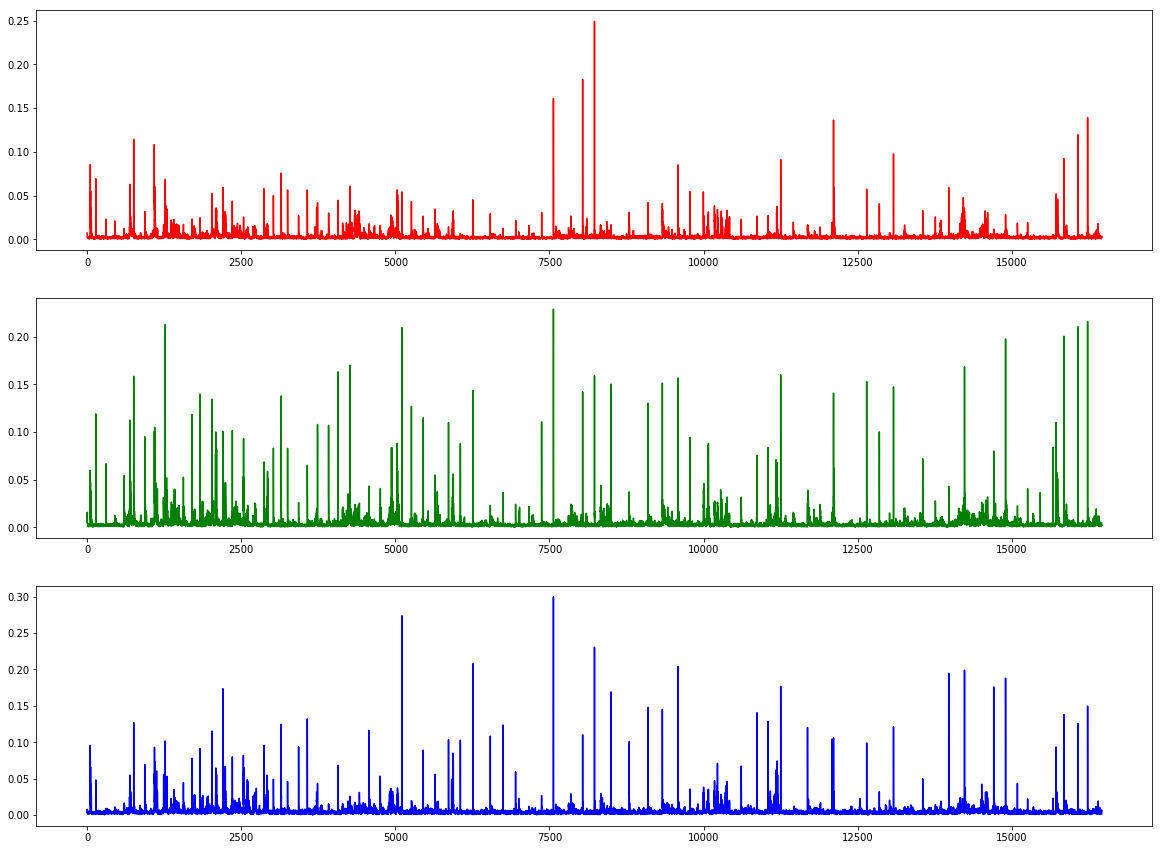

<Figure size 1152x432 with 0 Axes>

In [115]:
idx = [i for i in range(len(LABELS)) if(LABELS[i]=="SITTING")][0]
# print(idx)

rest_dict = X_train_dict[idx]
# print(len(rest_dict))

all_std = []
window = []

cnt = 0
H = 10
for X_i in rest_dict:
    cnt += 1
    window.append(X_i)
    if(cnt==H):
        std_i = np.std(window,axis=0)
        all_std.append(std_i)
        window.clear()
        cnt = 0

all_std = np.array(all_std)
# print(all_std)

C = 0.2
sum_std_i = [0,0,0]
count = [0,0,0]
for elem in all_std:
    for i in range(len(elem)):
        if(elem[i]<=C):
            count[i] += 1
            sum_std_i[i] += elem[i]
    

sum_std_i = np.array(sum_std_i)
count = np.array(count)
std_i_bar = sum_std_i/count
print(std_i_bar)

# std_i_bar_ = [std_i_bar for i in range(3)]
# std_i_bar_ = np.array(std_i_bar_)
# print(std_i_bar_)

all_std_x = [e[0] for e in all_std]
all_std_y = [e[1] for e in all_std]
all_std_z = [e[2] for e in all_std]

fig,ax = plt.subplots(nrows=3, ncols=1, figsize=(20,15))
ax[0].plot(all_std_x,'r')
ax[1].plot(all_std_y,'g')
ax[2].plot(all_std_z,'b')

plt.figure(figsize=(16,6))
plt.show()

In [175]:
def equation_bi(X_i):
    all_std = []
    
    std_i = np.std(X_i,axis=0)
    
    diff_std = std_i**2 - std_i_bar**2
    
    diff_std_ = diff_std / std_i_bar**2
    diff_std = (diff_std + 1) / (std_i_bar**2 + 1)
    
#     print(diff_std_)
#     print('---------')

#     all_std.append(diff_std_)
    all_std = np.array(diff_std)
#     print(all_std)
    
    ai = max(np.sum(all_std)/3,0)
    ai = np.sqrt(ai)
    
#     print(ai)
    
    return ai

In [117]:
import matplotlib.pyplot as plt
import matplotlib

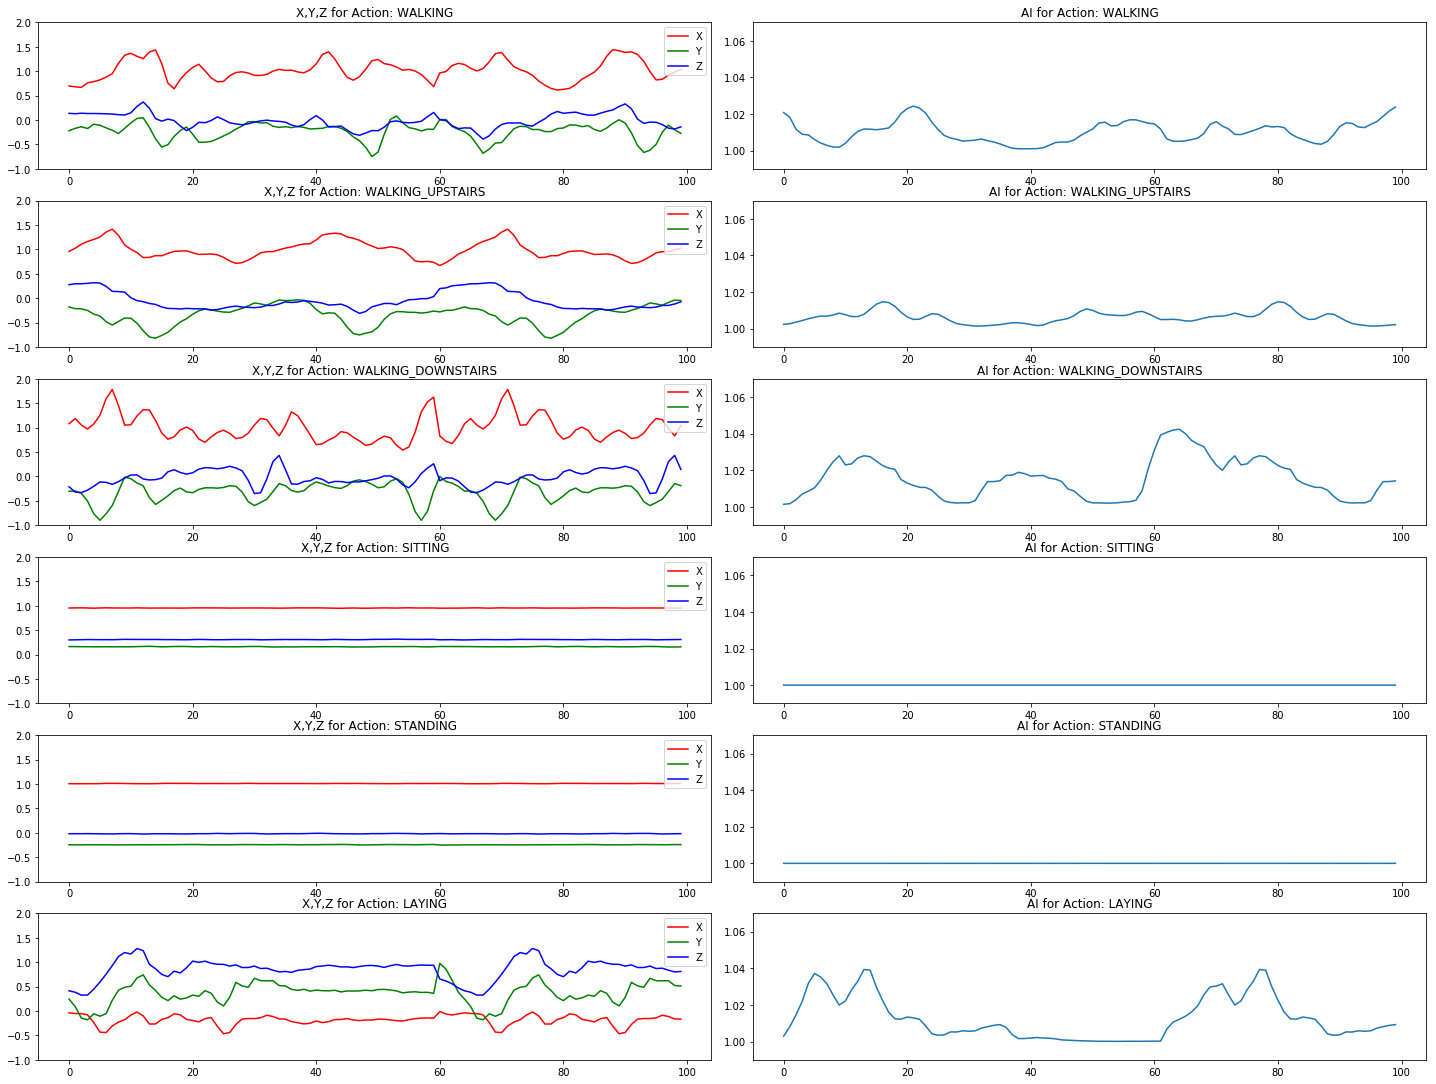

<Figure size 1152x648 with 0 Axes>

In [190]:
fig, axes = plt.subplots(nrows=labels_count, ncols=2, figsize=(20,15))
fig.tight_layout()

X_train_x = []
X_train_y = []
X_train_z = []
X_ai = []

ai_labels = []

count = 0
H = 10

for i in range(labels_count):
    ai_all = []
    
    X_train_dict[i] = np.array(X_train_dict[i])
#     graph_size = int(len(X_train_dict[i])/4)
    graph_size = 10000
    
    for j in range(2500,2600):
        
        if(j-H>=0):
            X_ai.clear()
            
            elem = X_train_dict[i][j]
            X_train_x.append(elem[0])
            X_train_y.append(elem[1])
            X_train_z.append(elem[2])
            
#             if(i==5):
#                 print(j,elem[0],elem[1],elem[2])
                
            for k in range(H,0,-1):
                elem = X_train_dict[i][j-k-1]
                X_ai.append([elem[0],elem[1],elem[2]])
        
            ai_val = equation_bi(X_ai)
            ai_all.append(ai_val)
    
#     print(ai_all)
    ai_labels.append(ai_all)
    
    ax = axes[i,0]
    ax.plot(X_train_x,'r',label='X')
    ax.plot(X_train_y,'g',label='Y')
    ax.plot(X_train_z,'b',label='Z')
    ax.set_title('X,Y,Z for Action: ' + LABELS[i])
    ax.set_ylim(bottom=-1.0,top=2.0)
    ax.legend(loc='upper right')
        
    ax = axes[i,1]
    ax.plot(ai_all)
    ax.set_title('AI for Action: ' + LABELS[i])
    ax.set_ylim(bottom=0.99,top=1.07)
    
    X_train_x.clear()
    X_train_y.clear()
    X_train_z.clear()
    
#     print(ai_labels)
    
plt.figure(figsize=(16,9))
fig.savefig('fig3.png', dpi = 300)

plt.show()

In [119]:
from scipy import stats

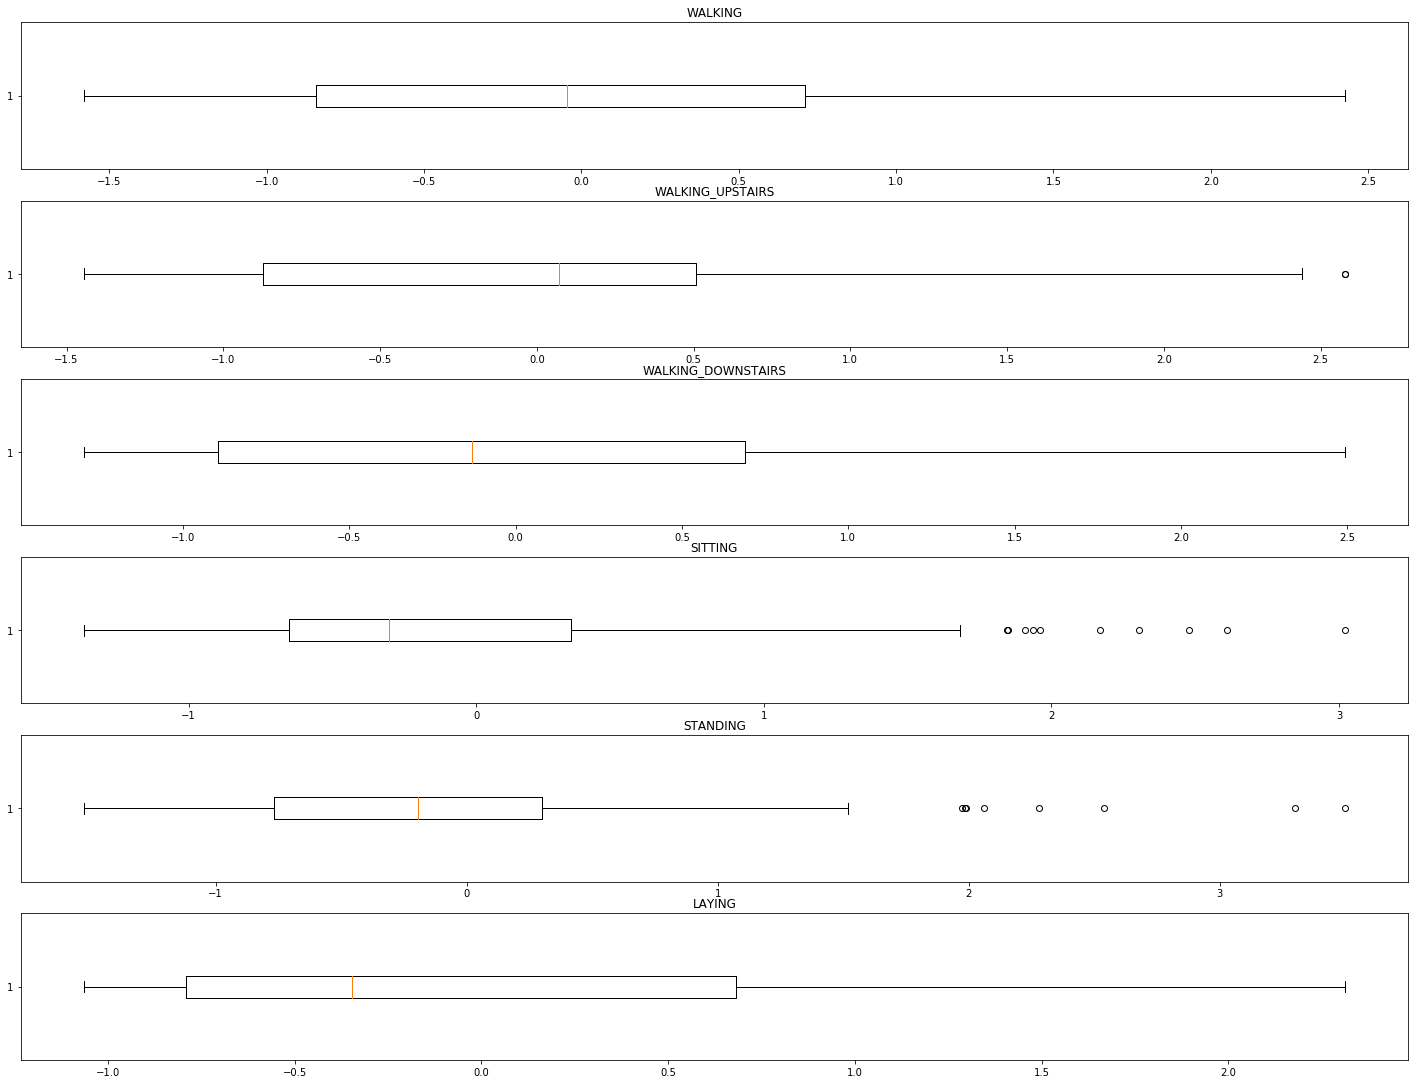

In [191]:
z = []
fig, axes = plt.subplots(nrows=labels_count, ncols=1, figsize=(20,15))
plt.tight_layout()
cnt = 0
for ai in ai_labels:
#     print(ai)
    z_score = stats.zscore(ai)
    z.append(z_score)
    axes[cnt].boxplot(z_score, vert=False)
    axes[cnt].set_title(LABELS[cnt])
    cnt += 1
    
plt.show()

In [183]:
for i in range(len(z)):
    z[i] = np.array(z[i])
    z_avg = np.average(z[i])
    print(LABELS[i], ': ', z_avg)

WALKING :  -1.7518799491717253e-14
WALKING_UPSTAIRS :  -3.479045368403969e-14
WALKING_DOWNSTAIRS :  2.51660453902992e-15
SITTING :  6.950486266057328e-14
STANDING :  -1.5971741209418983e-12
LAYING :  1.8668975692746982e-14


In [122]:
# import seaborn as sns

# sns.set_style('whitegrid')

In [123]:
# ax = sns.boxplot()